In [1]:
from core import *
from database import *
from simulator import *
from visualizer import *
import pandas as pd
import random

from _metrics import *

In [2]:
DEFAULT_PROJECT_DIR = "/fsx-onellm/margaretli/env_srcs/xlf/xlformers_n/scaling/data"

col_names = ['C', 'D', 'N', 'lr', 'Avg Train Loss', 'Max Train Loss', 'C4 Eval PPL', 'Wiki Eval PPL', 'C4 Eval Loss', 'Wiki Eval Loss']

def read_data(csv_file, loss_name='C4 Eval Loss', col_names=col_names):
    mins_only = []
    df = pd.read_csv(csv_file, usecols=col_names,)
    df.dropna(subset=[loss_name], inplace=True)

    if 'lr' in df.columns:
        df = df.loc[(df['lr'] >= 0)]
    if 'D' not in df.columns:
        df['D'] = df['C'] / (df['N'] * 6)
        
    n_vals = df['N'].unique()
    d_vals = sorted(df['D'].unique())
    for n in n_vals:
        for d in d_vals:
            cd_df = df[(df['N'] == n) & (df['D'] == d)]
            if cd_df.empty:
                continue
            min_index = cd_df[loss_name].idxmin()
            # print(min_index)
            # print(cd_df)
            # print(cd_df.loc[min_index])
            mins_only.append(cd_df.loc[min_index])

    mins_only_df = pd.DataFrame(mins_only)

    print(mins_only_df)
    # df.rename(columns={})
    return mins_only_df

             x          y    color             N             C hex_color  \
0    154.03592  140.63364  #faebdd  6.795600e+09  9.993853e+18   #faebdd   
1    151.60375  175.51709  #f8d1b8  2.979521e+09  9.227541e+18   #f8d1b8   
6    223.29648  175.51709  #931c5b  2.979521e+09  9.691017e+19   #931c5b   
2    153.29233  180.65761  #f47a54  2.638631e+09  9.753047e+18   #f47a54   
7    223.74805  180.65761  #8c1d5b  2.638631e+09  9.835628e+19   #8c1d5b   
..         ...        ...      ...           ...           ...       ...   
226  254.57913  244.27495  #781f59  5.865994e+08  2.703956e+20   #781f59   
227  256.05204  257.94760  #811e5a  4.246106e+08  2.837799e+20   #811e5a   
234  234.10686  252.01338  #871e5b  4.885467e+08  1.381549e+20   #871e5b   
236  248.18209  239.03398  #7a1f59  6.639580e+08  2.192159e+20   #7a1f59   
244  372.54603  140.63355  #34193d  6.795615e+09  1.295602e+22   #34193d   

         loss             D  
0    5.005582  2.451060e+08  
1    4.665232  5.161647e+08

[08:42:36] WARNING  You did not specify `model_search_config`. In order to find a model configuration,  ]8;id=319884;file:///opt/hpcaas/.mounts/fs-013ce0b72d8c07bba/margaretli/env_srcs/xlf/xlformers_n/scaling/core.py\core.py]8;;\:]8;id=457690;file:///opt/hpcaas/.mounts/fs-013ce0b72d8c07bba/margaretli/env_srcs/xlf/xlformers_n/scaling/core.py#108\108]8;;\
                    You will need to either:                                                                       
                    1.  Assign `model_search_config` attribute before calling `seed` method.                       
                    2.  Find the model configuration closest to `N` yourself, and optionally call                  
                    `cc.adjust_D_to_N(N)` when scaling.                                                            

           INFO     Mounting a directory: /fsx-onellm/margaretli/env_srcs/xlf/xlformers_n/scaling/data  ]8;id=120046;file:///opt/hpcaas/.mounts/fs-013ce0b72d8c07bba/margaretli/env_srcs/xlf/xlformers_n/scaling/core.py\core.py]8;;\:]8;id=35749;file:///opt/hpcaas/.mounts/fs-013ce0b72d8c07bba/margaretli/env_srcs/xlf/xlformers_n/scaling/core.py#159\159]8;;\

[08:42:36] INFO     Chinchilla instance created successfully.                                           ]8;id=879724;file:///opt/hpcaas/.mounts/fs-013ce0b72d8c07bba/margaretli/env_srcs/xlf/xlformers_n/scaling/core.py\core.py]8;;\:]8;id=150794;file:///opt/hpcaas/.mounts/fs-013ce0b72d8c07bba/margaretli/env_srcs/xlf/xlformers_n/scaling/core.py#164\164]8;;\

Optimization terminated successfully.Optimization terminated successfully.Optimization terminated successfully.Optimization terminated successfully.


         Current function value: 0.044291
         Current function value: 0.007728         Current function value: 0.007728
         Current function value: 0.007728         Current function value: 0.007728

         Current function value: 0.043304
         Iterations: 7         Iterations: 8

         Iterations: 3
         Iterations: 7         Current function value: 0.043251

         Function evaluations: 9         Iterations: 3         Function evaluations: 10

         Iterations: 9
         Function evaluations: 26
         Gradient evaluations: 9         Function evaluations: 9
         Function evaluations: 25
         Iterations: 3

Optimization terminated successfully.         Current function value: 0.059455         Current function value: 0.044733

         Gradient evaluations: 10         Gradient evaluations: 9         

[08:42:39] WARNING  /fsx-onellm/margaretli/miniforge3/envs/mlexp/lib/python3.9/site-packages/autogr ]8;id=463144;file:///fsx-onellm/margaretli/miniforge3/envs/mlexp/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=719592;file:///fsx-onellm/margaretli/miniforge3/envs/mlexp/lib/python3.9/warnings.py#109\109]8;;\
                    ad/tracer.py:48: RuntimeWarning: invalid value encountered in log                              
                      return f_raw(*args, **kwargs)                                                                
                                                                                                                   



         Iterations: 50
         Function evaluations: 80

         Gradient evaluations: 11         Gradient evaluations: 72

[08:42:39] WARNING  /fsx-onellm/margaretli/miniforge3/envs/mlexp/lib/python3.9/site-packages/autogr ]8;id=411022;file:///fsx-onellm/margaretli/miniforge3/envs/mlexp/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=991906;file:///fsx-onellm/margaretli/miniforge3/envs/mlexp/lib/python3.9/warnings.py#109\109]8;;\
                    ad/tracer.py:48: RuntimeWarning: invalid value encountered in log                              
                      return f_raw(*args, **kwargs)                                                                
                                                                                                                   

           WARNING  /fsx-onellm/margaretli/miniforge3/envs/mlexp/lib/python3.9/site-packages/autogr ]8;id=648193;file:///fsx-onellm/margaretli/miniforge3/envs/mlexp/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=294588;file:///fsx-onellm/margaretli/miniforge3/envs/mlexp/lib/python3.9/warnings.py#109\109]8;;\
                    ad/tracer.py:48: RuntimeWarning: invalid value encountered in log                              
                      return f_raw(*args, **kwargs)                                                                
                                                                                                                   

         Gradient evaluations: 80
         Function evaluations: 170Optimization terminated successfully.
         Gradient evaluations: 170

Optimization terminated successfully.Optimization terminated successfully.         Current function value: 0.043255         Current function value: 0.001948

           WARNING  /fsx-onellm/margaretli/miniforge3/envs/mlexp/lib/python3.9/site-packages/autogr ]8;id=560391;file:///fsx-onellm/margaretli/miniforge3/envs/mlexp/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=374326;file:///fsx-onellm/margaretli/miniforge3/envs/mlexp/lib/python3.9/warnings.py#109\109]8;;\
                    ad/tracer.py:48: RuntimeWarning: invalid value encountered in log                              
                      return f_raw(*args, **kwargs)                                                                
                                                                                                                   



Optimization terminated successfully.Optimization terminated successfully.         Current function value: 0.000163Optimization terminated successfully.         Iterations: 3





         Current function value: 0.000213         Current function value: 0.000167
         Iterations: 157         Current function value: 0.005176         Current function value: 0.000197         Function evaluations: 25

         Function evaluations: 184         Gradient evaluations: 20


         Iterations: 43         Iterations: 144
         Gradient evaluations: 184




Optimization terminated successfully.Optimization terminated successfully.         Iterations: 119         Function evaluations: 187
         Function evaluations: 53         Iterations: 149Optimization terminated successfully.         Iterations: 81



         Function evaluations: 172         Gradient evaluations: 53         Current function value: 0.001948         Current function value: 0.000160Optimization terminated successful

[08:42:41] WARNING  /fsx-onellm/margaretli/miniforge3/envs/mlexp/lib/python3.9/site-packages/autogr ]8;id=582293;file:///fsx-onellm/margaretli/miniforge3/envs/mlexp/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=813239;file:///fsx-onellm/margaretli/miniforge3/envs/mlexp/lib/python3.9/warnings.py#109\109]8;;\
                    ad/tracer.py:48: RuntimeWarning: invalid value encountered in log                              
                      return f_raw(*args, **kwargs)                                                                
                                                                                                                   

         Current function value: 0.005176

[08:42:41] WARNING  /fsx-onellm/margaretli/miniforge3/envs/mlexp/lib/python3.9/site-packages/autogr ]8;id=449285;file:///fsx-onellm/margaretli/miniforge3/envs/mlexp/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=518660;file:///fsx-onellm/margaretli/miniforge3/envs/mlexp/lib/python3.9/warnings.py#109\109]8;;\
                    ad/tracer.py:48: RuntimeWarning: invalid value encountered in log                              
                      return f_raw(*args, **kwargs)                                                                
                                                                                                                   


         Gradient evaluations: 77
         Iterations: 213

         Gradient evaluations: 111
         Iterations: 9

           WARNING  /fsx-onellm/margaretli/miniforge3/envs/mlexp/lib/python3.9/site-packages/autogr ]8;id=281898;file:///fsx-onellm/margaretli/miniforge3/envs/mlexp/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=981237;file:///fsx-onellm/margaretli/miniforge3/envs/mlexp/lib/python3.9/warnings.py#109\109]8;;\
                    ad/tracer.py:48: RuntimeWarning: invalid value encountered in log                              
                      return f_raw(*args, **kwargs)                                                                
                                                                                                                   

           WARNING  /fsx-onellm/margaretli/miniforge3/envs/mlexp/lib/python3.9/site-packages/autogr ]8;id=858940;file:///fsx-onellm/margaretli/miniforge3/envs/mlexp/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=228414;file:///fsx-onellm/margaretli/miniforge3/envs/mlexp/lib/python3.9/warnings.py#109\109]8;;\
                    ad/tracer.py:48: RuntimeWarning: invalid value encountered in log                              
                      return f_raw(*args, **kwargs)                                                                
                                                                                                                   

         Iterations: 90

Optimization terminated successfully.         Function evaluations: 111


         Function evaluations: 80         Function evaluations: 11         Function evaluations: 252Optimization terminated successfully.         Current function value: 0.000145         Gradient evaluations: 111


         Gradient evaluations: 80

         Current function value: 0.007728         Gradient evaluations: 11

         Gradient evaluations: 252
Optimization terminated successfully.
         Iterations: 9
         Current function value: 0.043257Optimization terminated successfully.


         Current function value: 0.000145         Iterations: 215         Function evaluations: 10


         Iterations: 3Optimization terminated successfully.

         Iterations: 185         Gradient evaluations: 10         Function evaluations: 270         Current function value: 0.044875
Optimization terminated successfully.

         Function evaluations: 25         Iterations: 3
        

[08:42:43] WARNING  /fsx-onellm/margaretli/miniforge3/envs/mlexp/lib/python3.9/site-packages/autogr ]8;id=972815;file:///fsx-onellm/margaretli/miniforge3/envs/mlexp/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=593657;file:///fsx-onellm/margaretli/miniforge3/envs/mlexp/lib/python3.9/warnings.py#109\109]8;;\
                    ad/tracer.py:48: RuntimeWarning: invalid value encountered in log                              
                      return f_raw(*args, **kwargs)                                                                
                                                                                                                   


         Iterations: 54
         Function evaluations: 11

         Function evaluations: 80

           WARNING  /fsx-onellm/margaretli/miniforge3/envs/mlexp/lib/python3.9/site-packages/autogr ]8;id=41767;file:///fsx-onellm/margaretli/miniforge3/envs/mlexp/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=886307;file:///fsx-onellm/margaretli/miniforge3/envs/mlexp/lib/python3.9/warnings.py#109\109]8;;\
                    ad/tracer.py:48: RuntimeWarning: invalid value encountered in log                              
                      return f_raw(*args, **kwargs)                                                                
                                                                                                                   

         Function evaluations: 180         Function evaluations: 10
Optimization terminated successfully.

         Gradient evaluations: 80         Gradient evaluations: 180         Gradient evaluations: 11


[08:42:43] WARNING  /fsx-onellm/margaretli/miniforge3/envs/mlexp/lib/python3.9/site-packages/autogr ]8;id=950697;file:///fsx-onellm/margaretli/miniforge3/envs/mlexp/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=583148;file:///fsx-onellm/margaretli/miniforge3/envs/mlexp/lib/python3.9/warnings.py#109\109]8;;\
                    ad/tracer.py:48: RuntimeWarning: invalid value encountered in log                              
                      return f_raw(*args, **kwargs)                                                                
                                                                                                                   




         Gradient evaluations: 10

         Gradient evaluations: 9         Current function value: 0.043259         Current function value: 0.005176

Optimization terminated successfully.
Optimization terminated successfully.
         Current function value: 0.005176
         Iterations: 64Optimization terminated successfully.

         Current function value: 0.007728         Iterations: 87         Function evaluations: 80

         Gradient evaluations: 80         Iterations: 7



Optimization terminated successfully.         Function evaluations: 109         Iterations: 3
         Current function value: 0.000145

         Function evaluations: 8         Gradient evaluations: 109         Function evaluations: 25
Optimization terminated successfully.


         Iterations: 287


         Function evaluations: 361
         Gradient evaluations: 361
         Gradient evaluations: 20         Current function value: 0.005176

           WARNING  /fsx-onellm/margaretli/miniforge3/envs/mlexp/lib/python3.9/site-packages/autogr ]8;id=907167;file:///fsx-onellm/margaretli/miniforge3/envs/mlexp/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=335724;file:///fsx-onellm/margaretli/miniforge3/envs/mlexp/lib/python3.9/warnings.py#109\109]8;;\
                    ad/tracer.py:48: RuntimeWarning: invalid value encountered in log                              
                      return f_raw(*args, **kwargs)                                                                
                                                                                                                   

         Gradient evaluations: 8
         Current function value: 0.001948

Optimization terminated successfully.
         Iterations: 58

         Iterations: 88Optimization terminated successfully.         Function evaluations: 73Optimization terminated successfully.
         Current function value: 0.000168

         Current function value: 0.001948         Gradient evaluations: 73         Function evaluations: 108


         Current function value: 0.045403Optimization terminated successfully.         Iterations: 100
         Gradient evaluations: 108         Iterations: 66
         Iterations: 3



         Function evaluations: 81Optimization terminated successfully.         Function evaluations: 25
         Current function value: 0.005176


         Iterations: 88Optimization terminated successfully.

         Gradient evaluations: 81

         Current function value: 0.005176         Current function value: 0.001948         Current function value: 0.001948


Optimization termi

[08:42:46] WARNING  /fsx-onellm/margaretli/miniforge3/envs/mlexp/lib/python3.9/site-packages/autogr ]8;id=661059;file:///fsx-onellm/margaretli/miniforge3/envs/mlexp/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=616849;file:///fsx-onellm/margaretli/miniforge3/envs/mlexp/lib/python3.9/warnings.py#109\109]8;;\
                    ad/tracer.py:48: RuntimeWarning: invalid value encountered in log                              
                      return f_raw(*args, **kwargs)                                                                
                                                                                                                   


         Current function value: 0.000145         Function evaluations: 81
         Iterations: 101

         Function evaluations: 244
         Function evaluations: 128         Gradient evaluations: 81

         Gradient evaluations: 128         Current function value: 0.005176

           WARNING  /fsx-onellm/margaretli/miniforge3/envs/mlexp/lib/python3.9/site-packages/autogr ]8;id=428653;file:///fsx-onellm/margaretli/miniforge3/envs/mlexp/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=821401;file:///fsx-onellm/margaretli/miniforge3/envs/mlexp/lib/python3.9/warnings.py#109\109]8;;\
                    ad/tracer.py:48: RuntimeWarning: invalid value encountered in log                              
                      return f_raw(*args, **kwargs)                                                                
                                                                                                                   




         Gradient evaluations: 244Optimization terminated successfully.         Iterations: 35


         Iterations: 287
         Function evaluations: 344         Function evaluations: 39
         Current function value: 0.005176


[08:42:47] WARNING  /fsx-onellm/margaretli/miniforge3/envs/mlexp/lib/python3.9/site-packages/autogr ]8;id=747711;file:///fsx-onellm/margaretli/miniforge3/envs/mlexp/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=945454;file:///fsx-onellm/margaretli/miniforge3/envs/mlexp/lib/python3.9/warnings.py#109\109]8;;\
                    ad/tracer.py:48: RuntimeWarning: invalid value encountered in log                              
                      return f_raw(*args, **kwargs)                                                                
                                                                                                                   




         Gradient evaluations: 39         Gradient evaluations: 344Optimization terminated successfully.

Optimization terminated successfully.Optimization terminated successfully.Optimization terminated successfully.Optimization terminated successfully.
         Iterations: 90



         Current function value: 0.005176         Current function value: 0.005176         Current function value: 0.001948         Current function value: 0.001948         Current function value: 0.000166         Current function value: 0.049183Optimization terminated successfully.

           WARNING  /fsx-onellm/margaretli/miniforge3/envs/mlexp/lib/python3.9/site-packages/autogr ]8;id=660849;file:///fsx-onellm/margaretli/miniforge3/envs/mlexp/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=486875;file:///fsx-onellm/margaretli/miniforge3/envs/mlexp/lib/python3.9/warnings.py#109\109]8;;\
                    ad/tracer.py:48: RuntimeWarning: invalid value encountered in log                              
                      return f_raw(*args, **kwargs)                                                                
                                                                                                                   



         Function evaluations: 120



Optimization terminated successfully.
         Iterations: 39
         Iterations: 132         Iterations: 3         Iterations: 88         Iterations: 85




Optimization terminated successfully.         Current function value: 0.007728         Current function value: 0.005176         Iterations: 52         Gradient evaluations: 120
         Function evaluations: 51
         Function evaluations: 26Optimization terminated successfully.         Function evaluations: 125


         Function evaluations: 176         Current function value: 0.005176
         Iterations: 7
         Function evaluations: 78


Optimization terminated successfully.
         Gradient evaluations: 51         Iterations: 47

         Current function value: 0.007728         Gradient evaluations: 125         Gradient evaluations: 21
         Gradient evaluations: 78



         Iterations: 80

         Iterations: 7

         Current function value: 0.000145         Functio

[08:42:57] WARNING  /fsx-onellm/margaretli/miniforge3/envs/mlexp/lib/python3.9/site-packages/autogr ]8;id=212221;file:///fsx-onellm/margaretli/miniforge3/envs/mlexp/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=866309;file:///fsx-onellm/margaretli/miniforge3/envs/mlexp/lib/python3.9/warnings.py#109\109]8;;\
                    ad/tracer.py:48: RuntimeWarning: invalid value encountered in log                              
                      return f_raw(*args, **kwargs)                                                                
                                                                                                                   

         Gradient evaluations: 104         Function evaluations: 105Optimization terminated successfully.

         Gradient evaluations: 8         Function evaluations: 318         Gradient evaluations: 105



         Current function value: 0.005176
         Current function value: 0.005176
Optimization terminated successfully.
         Function evaluations: 367
         Iterations: 76
         Iterations: 60
Optimization terminated successfully.

           WARNING  /fsx-onellm/margaretli/miniforge3/envs/mlexp/lib/python3.9/site-packages/autogr ]8;id=97280;file:///fsx-onellm/margaretli/miniforge3/envs/mlexp/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=388798;file:///fsx-onellm/margaretli/miniforge3/envs/mlexp/lib/python3.9/warnings.py#109\109]8;;\
                    ad/tracer.py:48: RuntimeWarning: invalid value encountered in log                              
                      return f_raw(*args, **kwargs)                                                                
                                                                                                                   

         Gradient evaluations: 318
         Function evaluations: 114         Current function value: 0.001948
Optimization terminated successfully.         Gradient evaluations: 367


         Current function value: 0.000171

[08:42:57] WARNING  /fsx-onellm/margaretli/miniforge3/envs/mlexp/lib/python3.9/site-packages/autogr ]8;id=542621;file:///fsx-onellm/margaretli/miniforge3/envs/mlexp/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=68822;file:///fsx-onellm/margaretli/miniforge3/envs/mlexp/lib/python3.9/warnings.py#109\109]8;;\
                    ad/tracer.py:48: RuntimeWarning: invalid value encountered in log                              
                      return f_raw(*args, **kwargs)                                                                
                                                                                                                   


         Gradient evaluations: 114
         Iterations: 53
Optimization terminated successfully.

         Iterations: 108
         Current function value: 0.001948         Function evaluations: 79Optimization terminated successfully.


         Function evaluations: 71
         Function evaluations: 142
Optimization terminated successfully.         Current function value: 0.005176         Gradient evaluations: 71         Gradient evaluations: 79
Optimization terminated successfully.





[08:42:58] WARNING  /fsx-onellm/margaretli/miniforge3/envs/mlexp/lib/python3.9/site-packages/autogr ]8;id=336594;file:///fsx-onellm/margaretli/miniforge3/envs/mlexp/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=947343;file:///fsx-onellm/margaretli/miniforge3/envs/mlexp/lib/python3.9/warnings.py#109\109]8;;\
                    ad/tracer.py:48: RuntimeWarning: invalid value encountered in log                              
                      return f_raw(*args, **kwargs)                                                                
                                                                                                                   


         Iterations: 36         Current function value: 0.007728         Iterations: 46         Current function value: 0.000145Optimization terminated successfully.



         Function evaluations: 52         Function evaluations: 62         Iterations: 251         Current function value: 0.007728

         Gradient evaluations: 62
         Gradient evaluations: 52Optimization terminated successfully.
         Iterations: 7





         Current function value: 0.053811         Iterations: 7         Current function value: 0.000145         Function evaluations: 303         Gradient evaluations: 142
         Iterations: 3         Current function value: 0.001948


Optimization terminated successfully.         Function evaluations: 9
         Iterations: 459
         Function evaluations: 9         Function evaluations: 26

         Gradient evaluations: 303

Optimization terminated successfully.

         Gradient evaluations: 9         Iterations: 93         Current function value: 

[08:43:07] WARNING  /fsx-onellm/margaretli/miniforge3/envs/mlexp/lib/python3.9/site-packages/autogr ]8;id=717562;file:///fsx-onellm/margaretli/miniforge3/envs/mlexp/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=563553;file:///fsx-onellm/margaretli/miniforge3/envs/mlexp/lib/python3.9/warnings.py#109\109]8;;\
                    ad/tracer.py:48: RuntimeWarning: invalid value encountered in log                              
                      return f_raw(*args, **kwargs)                                                                
                                                                                                                   


         Current function value: 0.005176
Optimization terminated successfully.         Function evaluations: 304

Optimization terminated successfully.

[08:43:07] WARNING  /fsx-onellm/margaretli/miniforge3/envs/mlexp/lib/python3.9/site-packages/autogr ]8;id=231834;file:///fsx-onellm/margaretli/miniforge3/envs/mlexp/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=760399;file:///fsx-onellm/margaretli/miniforge3/envs/mlexp/lib/python3.9/warnings.py#109\109]8;;\
                    ad/tracer.py:48: RuntimeWarning: invalid value encountered in log                              
                      return f_raw(*args, **kwargs)                                                                
                                                                                                                   


         Current function value: 0.000145Optimization terminated successfully.
         Iterations: 77         Iterations: 72         Current function value: 0.005176
         Gradient evaluations: 304         Function evaluations: 110


           WARNING  /fsx-onellm/margaretli/miniforge3/envs/mlexp/lib/python3.9/site-packages/autogr ]8;id=999601;file:///fsx-onellm/margaretli/miniforge3/envs/mlexp/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=350833;file:///fsx-onellm/margaretli/miniforge3/envs/mlexp/lib/python3.9/warnings.py#109\109]8;;\
                    ad/tracer.py:48: RuntimeWarning: invalid value encountered in log                              
                      return f_raw(*args, **kwargs)                                                                
                                                                                                                   


Optimization terminated successfully.



Optimization terminated successfully.         Iterations: 18
         Iterations: 296Optimization terminated successfully.         Current function value: 0.000145         Gradient evaluations: 110
         Function evaluations: 112         Current function value: 0.005176

         Current function value: 0.000145

         Function evaluations: 26

Optimization terminated successfully.         Function evaluations: 367         Iterations: 18         Current function value: 0.005176         Iterations: 257




           WARNING  /fsx-onellm/margaretli/miniforge3/envs/mlexp/lib/python3.9/site-packages/autogr ]8;id=738499;file:///fsx-onellm/margaretli/miniforge3/envs/mlexp/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=779292;file:///fsx-onellm/margaretli/miniforge3/envs/mlexp/lib/python3.9/warnings.py#109\109]8;;\
                    ad/tracer.py:48: RuntimeWarning: invalid value encountered in log                              
                      return f_raw(*args, **kwargs)                                                                
                                                                                                                   


Optimization terminated successfully.


         Gradient evaluations: 367         Current function value: 0.005176
         Function evaluations: 26         Gradient evaluations: 112         Function evaluations: 324         Gradient evaluations: 26

         Iterations: 290





         Iterations: 79         Iterations: 51         Gradient evaluations: 26
         Function evaluations: 358         Current function value: 0.001947


         Current function value: 0.058613Optimization terminated successfully.         Gradient evaluations: 358


         Iterations: 3
         Function evaluations: 26         Iterations: 68


         Gradient evaluations: 22Optimization terminated successfully.Optimization terminated successfully.         Gradient evaluations: 324
         Function evaluations: 61Optimization terminated successfully.         Current function value: 0.001948

         Function evaluations: 85
         Current function value: 0.007728         Iterations: 50
        

[08:43:18] WARNING  /fsx-onellm/margaretli/miniforge3/envs/mlexp/lib/python3.9/site-packages/autogr ]8;id=630087;file:///fsx-onellm/margaretli/miniforge3/envs/mlexp/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=114262;file:///fsx-onellm/margaretli/miniforge3/envs/mlexp/lib/python3.9/warnings.py#109\109]8;;\
                    ad/tracer.py:48: RuntimeWarning: invalid value encountered in log                              
                      return f_raw(*args, **kwargs)                                                                
                                                                                                                   

         Gradient evaluations: 128
         Gradient evaluations: 9         Current function value: 0.001948
         Iterations: 86

         Iterations: 13
         Function evaluations: 15Optimization terminated successfully.


         Function evaluations: 115         Gradient evaluations: 15

         Gradient evaluations: 115


           WARNING  /fsx-onellm/margaretli/miniforge3/envs/mlexp/lib/python3.9/site-packages/autogr ]8;id=542547;file:///fsx-onellm/margaretli/miniforge3/envs/mlexp/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=753515;file:///fsx-onellm/margaretli/miniforge3/envs/mlexp/lib/python3.9/warnings.py#109\109]8;;\
                    ad/tracer.py:48: RuntimeWarning: invalid value encountered in log                              
                      return f_raw(*args, **kwargs)                                                                
                                                                                                                   

         Current function value: 0.005176
         Iterations: 77
Optimization terminated successfully.Optimization terminated successfully.         Function evaluations: 111
         Current function value: 0.000145


         Gradient evaluations: 111

[08:43:18] WARNING  /fsx-onellm/margaretli/miniforge3/envs/mlexp/lib/python3.9/site-packages/autogr ]8;id=77641;file:///fsx-onellm/margaretli/miniforge3/envs/mlexp/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=376746;file:///fsx-onellm/margaretli/miniforge3/envs/mlexp/lib/python3.9/warnings.py#109\109]8;;\
                    ad/tracer.py:48: RuntimeWarning: invalid value encountered in log                              
                      return f_raw(*args, **kwargs)                                                                
                                                                                                                   

         Current function value: 0.000145
         Iterations: 261Optimization terminated successfully.Optimization terminated successfully.


         Current function value: 0.005176         Function evaluations: 339

Optimization terminated successfully.

           WARNING  /fsx-onellm/margaretli/miniforge3/envs/mlexp/lib/python3.9/site-packages/autogr ]8;id=895883;file:///fsx-onellm/margaretli/miniforge3/envs/mlexp/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=101923;file:///fsx-onellm/margaretli/miniforge3/envs/mlexp/lib/python3.9/warnings.py#109\109]8;;\
                    ad/tracer.py:48: RuntimeWarning: invalid value encountered in log                              
                      return f_raw(*args, **kwargs)                                                                
                                                                                                                   

         Current function value: 0.001948
         Iterations: 431         Iterations: 50
         Gradient evaluations: 339
         Iterations: 54


         Function evaluations: 67

         Function evaluations: 528         Current function value: 0.000145         Function evaluations: 80Optimization terminated successfully.         Gradient evaluations: 528


         Gradient evaluations: 67         Iterations: 252         Gradient evaluations: 80

Optimization terminated successfully.
         Function evaluations: 301



         Gradient evaluations: 301         Current function value: 0.001948
Optimization terminated successfully.

         Current function value: 0.007727         Current function value: 0.005176Optimization terminated successfully.Optimization terminated successfully.


         Iterations: 51
         Iterations: 7         Iterations: 62         Current function value: 0.001948         Current function value: 0.007728

         Function evaluations: 79

  

[08:43:19] WARNING  /fsx-onellm/margaretli/miniforge3/envs/mlexp/lib/python3.9/site-packages/autogr ]8;id=527683;file:///fsx-onellm/margaretli/miniforge3/envs/mlexp/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=225095;file:///fsx-onellm/margaretli/miniforge3/envs/mlexp/lib/python3.9/warnings.py#109\109]8;;\
                    ad/tracer.py:48: RuntimeWarning: invalid value encountered in log                              
                      return f_raw(*args, **kwargs)                                                                
                                                                                                                   

         Iterations: 261         Gradient evaluations: 109         Current function value: 0.007728

Optimization terminated successfully.
         Iterations: 9Optimization terminated successfully.

         Function evaluations: 330         Current function value: 0.000145

[08:43:20] WARNING  /fsx-onellm/margaretli/miniforge3/envs/mlexp/lib/python3.9/site-packages/autogr ]8;id=889658;file:///fsx-onellm/margaretli/miniforge3/envs/mlexp/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=810864;file:///fsx-onellm/margaretli/miniforge3/envs/mlexp/lib/python3.9/warnings.py#109\109]8;;\
                    ad/tracer.py:48: RuntimeWarning: invalid value encountered in log                              
                      return f_raw(*args, **kwargs)                                                                
                                                                                                                   


         Function evaluations: 11
         Gradient evaluations: 330         Gradient evaluations: 11

         Iterations: 273
Optimization terminated successfully.

         Current function value: 0.001684
         Function evaluations: 332         Iterations: 51

         Current function value: 0.000145
         Function evaluations: 108Optimization terminated successfully.
Optimization terminated successfully.         Gradient evaluations: 332         Iterations: 483         Current function value: 0.001947



         Current function value: 0.007728         Function evaluations: 608         Iterations: 27


         Iterations: 8
         Function evaluations: 37

         Gradient evaluations: 37         Gradient evaluations: 608         Function evaluations: 9

         Current function value: 0.001947


         Gradient evaluations: 9         Gradient evaluations: 99
         Iterations: 59Optimization terminated successfully.

Optimization terminated successfully.

      

[08:43:43] WARNING  /fsx-onellm/margaretli/miniforge3/envs/mlexp/lib/python3.9/site-packages/autogr ]8;id=972811;file:///fsx-onellm/margaretli/miniforge3/envs/mlexp/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=933632;file:///fsx-onellm/margaretli/miniforge3/envs/mlexp/lib/python3.9/warnings.py#109\109]8;;\
                    ad/tracer.py:48: RuntimeWarning: invalid value encountered in log                              
                      return f_raw(*args, **kwargs)                                                                
                                                                                                                   


         Iterations: 111         Function evaluations: 62




         Iterations: 186         Gradient evaluations: 99         Iterations: 8
         Current function value: 0.007728


         Function evaluations: 240         Function evaluations: 134         Function evaluations: 9         Iterations: 7


         Gradient evaluations: 62

         Gradient evaluations: 82

           WARNING  /fsx-onellm/margaretli/miniforge3/envs/mlexp/lib/python3.9/site-packages/autogr ]8;id=259151;file:///fsx-onellm/margaretli/miniforge3/envs/mlexp/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=507929;file:///fsx-onellm/margaretli/miniforge3/envs/mlexp/lib/python3.9/warnings.py#109\109]8;;\
                    ad/tracer.py:48: RuntimeWarning: invalid value encountered in log                              
                      return f_raw(*args, **kwargs)                                                                
                                                                                                                   



         Gradient evaluations: 9         Gradient evaluations: 240         Gradient evaluations: 134Optimization terminated successfully.

         Function evaluations: 8

Optimization terminated successfully.

Optimization terminated successfully.Optimization terminated successfully.         Current function value: 0.005176         Current function value: 0.001687         Gradient evaluations: 8



         Current function value: 0.007728

Optimization terminated successfully.
         Iterations: 56         Current function value: 0.000145         Iterations: 71         Current function value: 0.001948         Iterations: 7


         Function evaluations: 8         Function evaluations: 139         Function evaluations: 69

Optimization terminated successfully.

Optimization terminated successfully.Optimization terminated successfully.
Optimization terminated successfully.
         Iterations: 50
         Iterations: 223         Gradient evaluations: 135         Current function

[08:43:53] WARNING  /fsx-onellm/margaretli/miniforge3/envs/mlexp/lib/python3.9/site-packages/autogr ]8;id=720219;file:///fsx-onellm/margaretli/miniforge3/envs/mlexp/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=758348;file:///fsx-onellm/margaretli/miniforge3/envs/mlexp/lib/python3.9/warnings.py#109\109]8;;\
                    ad/tracer.py:48: RuntimeWarning: invalid value encountered in log                              
                      return f_raw(*args, **kwargs)                                                                
                                                                                                                   

         Current function value: 0.001948         Iterations: 7
         Gradient evaluations: 141
         Function evaluations: 9         Gradient evaluations: 71


Optimization terminated successfully.         Current function value: 0.001948

         Gradient evaluations: 9         Iterations: 57         Function evaluations: 10




         Function evaluations: 71         Gradient evaluations: 10

         Iterations: 63
         Gradient evaluations: 71
         Function evaluations: 99
         Current function value: 0.007728         Gradient evaluations: 99Optimization terminated successfully.


         Current function value: 0.005176Optimization terminated successfully.
Optimization terminated successfully.
         Iterations: 7
         Current function value: 0.001948
Optimization terminated successfully.         Iterations: 71         Function evaluations: 8



           WARNING  /fsx-onellm/margaretli/miniforge3/envs/mlexp/lib/python3.9/site-packages/autogr ]8;id=281388;file:///fsx-onellm/margaretli/miniforge3/envs/mlexp/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=794749;file:///fsx-onellm/margaretli/miniforge3/envs/mlexp/lib/python3.9/warnings.py#109\109]8;;\
                    ad/tracer.py:48: RuntimeWarning: invalid value encountered in log                              
                      return f_raw(*args, **kwargs)                                                                
                                                                                                                   

         Current function value: 0.007728         Iterations: 72


         Gradient evaluations: 8Optimization terminated successfully.         Function evaluations: 89

         Iterations: 8
         Gradient evaluations: 89
Optimization terminated successfully.         Current function value: 0.005176
         Function evaluations: 103


Optimization terminated successfully.
         Function evaluations: 9         Current function value: 0.001948

         Current function value: 0.005176         Gradient evaluations: 9         Iterations: 63
         Gradient evaluations: 103Optimization terminated successfully.Optimization terminated successfully.
         Current function value: 0.001343         Iterations: 72


         Iterations: 73

Optimization terminated successfully.
         Iterations: 73         Current function value: 0.007728

         Function evaluations: 94         Function evaluations: 145         Current function value: 0.000145         Function evaluations: 10

[08:44:11] WARNING  /fsx-onellm/margaretli/miniforge3/envs/mlexp/lib/python3.9/site-packages/autogr ]8;id=793533;file:///fsx-onellm/margaretli/miniforge3/envs/mlexp/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=332273;file:///fsx-onellm/margaretli/miniforge3/envs/mlexp/lib/python3.9/warnings.py#109\109]8;;\
                    ad/tracer.py:48: RuntimeWarning: invalid value encountered in log                              
                      return f_raw(*args, **kwargs)                                                                
                                                                                                                   



         Function evaluations: 9         Gradient evaluations: 10
Optimization terminated successfully.

Optimization terminated successfully.         Gradient evaluations: 9         Current function value: 0.000145



Optimization terminated successfully.         Iterations: 435
Optimization terminated successfully.
         Current function value: 0.005176         Function evaluations: 535
         Current function value: 0.005176         Iterations: 86

         Iterations: 84         Current function value: 0.001947


Optimization terminated successfully.
         Function evaluations: 111         Iterations: 51
         Function evaluations: 115
         Gradient evaluations: 535

         Current function value: 0.007728

         Function evaluations: 61         Gradient evaluations: 115         Gradient evaluations: 111

         Iterations: 9
         Gradient evaluations: 61
Optimization terminated successfully.
         Function evaluations: 11Optimization terminated succe

[08:44:13] WARNING  /fsx-onellm/margaretli/miniforge3/envs/mlexp/lib/python3.9/site-packages/autogr ]8;id=294486;file:///fsx-onellm/margaretli/miniforge3/envs/mlexp/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=557012;file:///fsx-onellm/margaretli/miniforge3/envs/mlexp/lib/python3.9/warnings.py#109\109]8;;\
                    ad/tracer.py:48: RuntimeWarning: invalid value encountered in log                              
                      return f_raw(*args, **kwargs)                                                                
                                                                                                                   

         Current function value: 0.000145Optimization terminated successfully.         Function evaluations: 8


Optimization terminated successfully.         Gradient evaluations: 111
         Iterations: 442

Optimization terminated successfully.
         Current function value: 0.007728         Gradient evaluations: 8         Current function value: 0.005176


         Current function value: 0.000145         Current function value: 0.005176         Iterations: 8

Optimization terminated successfully.
         Current function value: 0.001657Optimization terminated successfully.
         Iterations: 85         Iterations: 199

Optimization terminated successfully.
         Iterations: 82

         Function evaluations: 571
         Function evaluations: 114         Current function value: 0.000145         Function evaluations: 250



         Function evaluations: 11
         Gradient evaluations: 250         Gradient evaluations: 571         Iterations: 293         Gradient evaluat

[08:44:59] WARNING  /fsx-onellm/margaretli/miniforge3/envs/mlexp/lib/python3.9/site-packages/autogr ]8;id=454761;file:///fsx-onellm/margaretli/miniforge3/envs/mlexp/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=454512;file:///fsx-onellm/margaretli/miniforge3/envs/mlexp/lib/python3.9/warnings.py#109\109]8;;\
                    ad/tracer.py:48: RuntimeWarning: invalid value encountered in log                              
                      return f_raw(*args, **kwargs)                                                                
                                                                                                                   

         Function evaluations: 305         Current function value: 0.000145

Optimization terminated successfully.         Function evaluations: 338
         Iterations: 54         Iterations: 53         Gradient evaluations: 305Optimization terminated successfully.



Optimization terminated successfully.         Iterations: 265         Function evaluations: 70
         Function evaluations: 83         Gradient evaluations: 338



         Function evaluations: 328
         Current function value: 0.005176         Current function value: 0.007728
         Gradient evaluations: 70

Optimization terminated successfully.


         Gradient evaluations: 83         Current function value: 0.001948         Gradient evaluations: 328


         Iterations: 79         Iterations: 44Optimization terminated successfully.         Iterations: 5

           WARNING  /fsx-onellm/margaretli/miniforge3/envs/mlexp/lib/python3.9/site-packages/autogr ]8;id=582741;file:///fsx-onellm/margaretli/miniforge3/envs/mlexp/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=393433;file:///fsx-onellm/margaretli/miniforge3/envs/mlexp/lib/python3.9/warnings.py#109\109]8;;\
                    ad/tracer.py:48: RuntimeWarning: invalid value encountered in log                              
                      return f_raw(*args, **kwargs)                                                                
                                                                                                                   





Optimization terminated successfully.         Function evaluations: 6         Function evaluations: 54         Function evaluations: 111



         Current function value: 0.007727Optimization terminated successfully.
         Current function value: 0.007728
         Gradient evaluations: 6
         Gradient evaluations: 54         Iterations: 4         Gradient evaluations: 111

         Current function value: 0.007728


         Current function value: 0.001742Optimization terminated successfully.
         Current function value: 0.001948
         Iterations: 54
         Function evaluations: 84
         Gradient evaluations: 84

         Iterations: 4         Function evaluations: 5         Iterations: 36


         Current function value: 0.000145         Function evaluations: 5         Gradient evaluations: 5         Iterations: 7



Optimization terminated successfully.
         Iterations: 254
         Function evaluations: 8         Function evaluations: 97         Curre

[08:45:27] WARNING  /fsx-onellm/margaretli/miniforge3/envs/mlexp/lib/python3.9/site-packages/autogr ]8;id=676958;file:///fsx-onellm/margaretli/miniforge3/envs/mlexp/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=752342;file:///fsx-onellm/margaretli/miniforge3/envs/mlexp/lib/python3.9/warnings.py#109\109]8;;\
                    ad/tracer.py:48: RuntimeWarning: invalid value encountered in log                              
                      return f_raw(*args, **kwargs)                                                                
                                                                                                                   



         Function evaluations: 6
         Gradient evaluations: 88         Iterations: 69         Function evaluations: 54         Current function value: 0.005176
         Gradient evaluations: 6Optimization terminated successfully.

Optimization terminated successfully.


         Iterations: 71         Gradient evaluations: 54

Optimization terminated successfully.


         Iterations: 72         Gradient evaluations: 6
         Function evaluations: 99
Optimization terminated successfully.         Current function value: 0.001947         Current function value: 0.001948Optimization terminated successfully.
         Current function value: 0.005176
         Current function value: 0.001948         Current function value: 0.001948

         Function evaluations: 6


Optimization terminated successfully.         Iterations: 75
         Function evaluations: 107         Function evaluations: 88
         Gradient evaluations: 6

         Gradient evaluations: 99

         Iterations

[08:45:28] WARNING  /fsx-onellm/margaretli/miniforge3/envs/mlexp/lib/python3.9/site-packages/autogr ]8;id=789798;file:///fsx-onellm/margaretli/miniforge3/envs/mlexp/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=320263;file:///fsx-onellm/margaretli/miniforge3/envs/mlexp/lib/python3.9/warnings.py#109\109]8;;\
                    ad/tracer.py:48: RuntimeWarning: invalid value encountered in log                              
                      return f_raw(*args, **kwargs)                                                                
                                                                                                                   




         Iterations: 46         Function evaluations: 94
Optimization terminated successfully.         Function evaluations: 55
         Iterations: 4
         Current function value: 0.007728



         Gradient evaluations: 109
Optimization terminated successfully.         Gradient evaluations: 94Optimization terminated successfully.

         Current function value: 0.005176         Function evaluations: 5         Function evaluations: 63         Iterations: 5         Gradient evaluations: 55

         Gradient evaluations: 95






         Current function value: 0.001948         Gradient evaluations: 63Optimization terminated successfully.Optimization terminated successfully.         Current function value: 0.007728         Iterations: 76         Gradient evaluations: 5Optimization terminated successfully.         Current function value: 0.001514         Function evaluations: 6






         Current function value: 0.001948         Iterations: 4
         Current function val

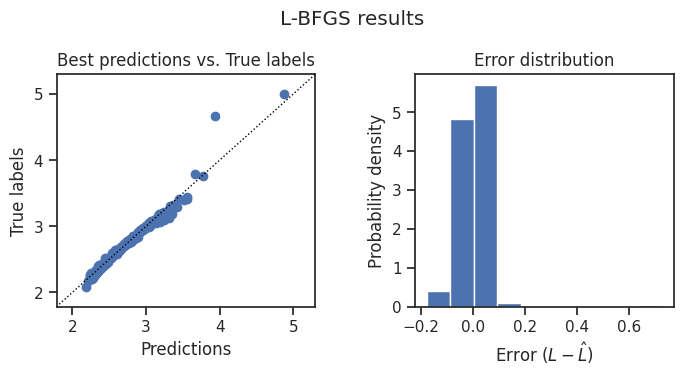

[08:46:46] INFO     Loss predictor:                                                                     ]8;id=489386;file:///opt/hpcaas/.mounts/fs-013ce0b72d8c07bba/margaretli/env_srcs/xlf/xlformers_n/scaling/core.py\core.py]8;;\:]8;id=641935;file:///opt/hpcaas/.mounts/fs-013ce0b72d8c07bba/margaretli/env_srcs/xlf/xlformers_n/scaling/core.py#419\419]8;;\
                                                                                                                   
                      L(N, D) = 1.992 + 749.4 / (N ^ 0.3721) + 3.705e+05 / (D ^ 0.6120)                            
                                                                                                                   

           INFO     Optimization infofunc_calls: 340, grad_calls: 340, warnflag: 0                      ]8;id=971922;file:///opt/hpcaas/.mounts/fs-013ce0b72d8c07bba/margaretli/env_srcs/xlf/xlformers_n/scaling/core.py\core.py]8;;\:]8;id=10881;file:///opt/hpcaas/.mounts/fs-013ce0b72d8c07bba/margaretli/env_srcs/xlf/xlformers_n/scaling/core.py#424\424]8;;\

1.25e+18 65107546 3199833872 3.4833


5.01e+18 154383927 5408594093 3.0735


1.98e+19 362893337 9093581115 2.7789


1e+21 4160171096 40062454832 2.3094


1e+23 72936412358 228509548628 2.1012




In [6]:
loss_name = "loss"
csv_file = "/fsx-onellm/margaretli/env_srcs/xlf/xlformers_n/scaling/data/epoch_ai.csv"

fit_df = read_data(csv_file=csv_file, loss_name=loss_name, col_names=None)
project_dir=DEFAULT_PROJECT_DIR
# fit_df = fit_df[fit_df['N'] < 50000000]

cc = Chinchilla(
    project_dir,
    param_grid=dict(
        E=np.linspace(1, 4, 5),
        A=np.linspace(100, 4000, 5),
        B=np.linspace(100, 4000, 5),
        alpha=np.linspace(0.0, 1, 5),
        beta=np.linspace(0.0, 1, 5),
    ),
    seed_ranges=dict(C=(1e14, 1e20), N_to_D=(10, 120)),
    # Seed models: 10 ^ 14.5~15.5 FLOPS, 64 <= N/D <= 256
    model_search_config=None,
    scaling_factor=2.0,  # Double the compute budget each step (after seed models)
    df=fit_df,
    loss_name=loss_name,
    # weight_fn=lambda x: x**(1/2),
    loss_fn=log_huber,
)

cc.fit()

for C in [1.25E+18, 5.01E+18, 1.98E+19, 1E21, 1E23]:
    n1,d1 = cc.allocate_compute(C)
    print(C, int(n1) , int(d1), round(cc.predict_loss(n1, d1), 4))
    print('\n')



         lr  Avg Train Loss  Max Train Loss  C4 Eval PPL  Wiki Eval PPL  \
4    0.0040           4.957           5.185      146.194        216.300   
12   0.0040           4.717           5.044      119.259        166.031   
17   0.0040           4.453           4.659       89.148        115.380   
21   0.0040           3.999           4.218       61.665         70.939   
25   0.0040           3.736           4.058       46.984         47.592   
..      ...             ...             ...          ...            ...   
268  0.0020           2.899           3.182       21.522         16.467   
272  0.0020           2.864           3.263       20.629         15.535   
276  0.0020           2.815           3.157       19.575         14.377   
286  0.0010           2.725           3.060       17.837         12.987   
295  0.0008           2.487           2.915       14.389          9.577   

     C4 Eval Loss  Wiki Eval Loss             C             D            N  
4           4.985     

[08:46:46] WARNING  You did not specify `model_search_config`. In order to find a model configuration,  ]8;id=718274;file:///opt/hpcaas/.mounts/fs-013ce0b72d8c07bba/margaretli/env_srcs/xlf/xlformers_n/scaling/core.py\core.py]8;;\:]8;id=832292;file:///opt/hpcaas/.mounts/fs-013ce0b72d8c07bba/margaretli/env_srcs/xlf/xlformers_n/scaling/core.py#108\108]8;;\
                    You will need to either:                                                                       
                    1.  Assign `model_search_config` attribute before calling `seed` method.                       
                    2.  Find the model configuration closest to `N` yourself, and optionally call                  
                    `cc.adjust_D_to_N(N)` when scaling.                                                            

           INFO     Mounting a directory: /fsx-onellm/margaretli/env_srcs/xlf/xlformers_n/scaling/data  ]8;id=524691;file:///opt/hpcaas/.mounts/fs-013ce0b72d8c07bba/margaretli/env_srcs/xlf/xlformers_n/scaling/core.py\core.py]8;;\:]8;id=622309;file:///opt/hpcaas/.mounts/fs-013ce0b72d8c07bba/margaretli/env_srcs/xlf/xlformers_n/scaling/core.py#159\159]8;;\

[08:46:46] INFO     Chinchilla instance created successfully.                                           ]8;id=817459;file:///opt/hpcaas/.mounts/fs-013ce0b72d8c07bba/margaretli/env_srcs/xlf/xlformers_n/scaling/core.py\core.py]8;;\:]8;id=771693;file:///opt/hpcaas/.mounts/fs-013ce0b72d8c07bba/margaretli/env_srcs/xlf/xlformers_n/scaling/core.py#164\164]8;;\

         Current function value: 14.029801
         Iterations: 1
         Function evaluations: 16Optimization terminated successfully.Optimization terminated successfully.

         Current function value: 4.307500
         Current function value: 4.307500         Gradient evaluations: 4


         Iterations: 5
         Function evaluations: 10
         Gradient evaluations: 10
         Iterations: 7
         Function evaluations: 14
         Gradient evaluations: 14
         Current function value: 1.874753
         Current function value: 3.793228         Current function value: 3.847008         Current function value: 4.305906

         Iterations: 5         Iterations: 11         Iterations: 9

         Iterations: 5
         Function evaluations: 69
         Function evaluations: 67         Function evaluations: 65

         Gradient evaluations: 60

         Gradient evaluations: 64
         Function evaluations: 70         Gradient evaluations: 64

         Current function v



         Current function value: 1.362936
         Iterations: 4         Iterations: 41

         Function evaluations: 55
         Function evaluations: 117
         Gradient evaluations: 107
         Current function value: 4.310354         Gradient evaluations: 50

         Current function value: 1.509899         Iterations: 3
         Current function value: 0.803800         Function evaluations: 49


         Iterations: 12         Current function value: 4.307399         Gradient evaluations: 42

         Current function value: 22.303505
         Function evaluations: 134         Iterations: 75


         Gradient evaluations: 128         Function evaluations: 161         Iterations: 5
         Function evaluations: 71
         Gradient evaluations: 65         Iterations: 1



         Function evaluations: 16
         Current function value: 4.307358         Gradient evaluations: 154


         Iterations: 29         Gradient evaluations: 5         Function evaluations: 133


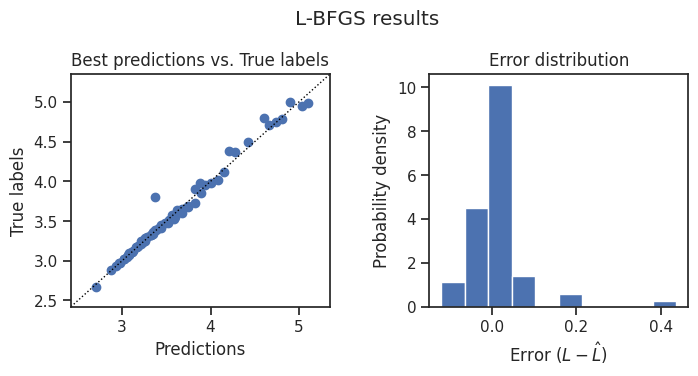

[08:56:21] INFO     Loss predictor:                                                                     ]8;id=755916;file:///opt/hpcaas/.mounts/fs-013ce0b72d8c07bba/margaretli/env_srcs/xlf/xlformers_n/scaling/core.py\core.py]8;;\:]8;id=772881;file:///opt/hpcaas/.mounts/fs-013ce0b72d8c07bba/margaretli/env_srcs/xlf/xlformers_n/scaling/core.py#419\419]8;;\
                                                                                                                   
                      L(N, D) = 1.946 + 23.42 / (N ^ 0.1842) + 1.600e+06 / (D ^ 0.7095)                            
                                                                                                                   

           INFO     Optimization infofunc_calls: 526, grad_calls: 519, warnflag: 2                      ]8;id=15659;file:///opt/hpcaas/.mounts/fs-013ce0b72d8c07bba/margaretli/env_srcs/xlf/xlformers_n/scaling/core.py\core.py]8;;\:]8;id=274901;file:///opt/hpcaas/.mounts/fs-013ce0b72d8c07bba/margaretli/env_srcs/xlf/xlformers_n/scaling/core.py#424\424]8;;\

1.25e+18 48330142 4310629405 3.0799


5.01e+18 145510808 5738405330 2.8716


1.98e+19 433240766 7617011728 2.703


1e+21 9750865664 17092499517 2.3725


1e+23 377472968897 44153271995 2.1634




In [7]:
loss_name = "C4 Eval Loss"
csv_file = "/fsx-onellm/margaretli/env_srcs/xlf/xlformers_n/scaling/data/dense.csv"
project_dir=DEFAULT_PROJECT_DIR

fit_df = read_data(csv_file=csv_file, loss_name=loss_name)
# fit_df = fit_df[fit_df['N'] < 50000000]


cc2 = Chinchilla(
    project_dir,
    param_grid=dict(
        E=np.linspace(1, 4, 4),
        A=np.linspace(100, 4000, 5),
        B=np.linspace(100, 4000, 5),
        alpha=np.linspace(0.0, 1, 5),
        beta=np.linspace(0.0, 1, 5),
    ),
    seed_ranges=dict(C=(1e14, 1e20), N_to_D=(10, 120)),
    # Seed models: 10 ^ 14.5~15.5 FLOPS, 64 <= N/D <= 256
    model_search_config=None,
    scaling_factor=2.0,  # Double the compute budget each step (after seed models)
    df=fit_df,
    loss_name=loss_name,
    # weight_fn=lambda x: x**(1/2),
    loss_fn=asymmetric_mae,
)

cc2.fit()

for C in [1.25E+18, 5.01E+18, 1.98E+19, 1E21, 1E23]:
    n1,d1 = cc2.allocate_compute(C)
    print(C, int(n1) , int(d1), round(cc2.predict_loss(n1, d1), 4))
    print('\n')


In [ ]:
def estimate_model_size(hidden_size, num_hidden_layers, num_heads, input_dim=32000, output_dim=32000):
    """You may narrow down the combinatorial space like this"""
    if not 2**6 <= hidden_size / num_hidden_layers < 2**10:
        return float("inf")
    """Assumption: the same hidden_size for all hidden layers"""
    embedding = input_dim * hidden_size
    attn = hidden_size * hidden_size * 4 # batchnorm
    ffn = hidden_size * hidden_size * 4 * 2
    layers = num_hidden_layers * (attn + ffn)
    norm = (1 + 2 * num_hidden_layers) * hidden_size
    head = hidden_size * output_dim
    return sum([embedding, layers, head, norm])


cc = Chinchilla(
    "/fsx-onellm/margaretli/env_srcs/xlf/xlformers_n/scaling/tmp",
    param_grid=dict(
        E=np.linspace(1.1, 1.5, 5),
        A=np.linspace(200, 1000, 5),
        B=np.linspace(200, 1000, 5),
        alpha=np.linspace(0.1, 0.5, 5),
        beta=np.linspace(0.1, 0.5, 5),
    ),
    seed_ranges=dict(C=(1e16, 1e18), N_to_D=(10, 100)),
    # To search for the model configuration with N closest to suggested:
    model_search_config=dict(
        hyperparam_grid=dict(
            hidden_size=list(range(64, 16384 + 1, 64)),
            num_hidden_layers=list(range(1, 50 + 1)),
            num_heads=list(range(1, 40 + 1)),
        ),
        size_estimator=estimate_model_size,  # You gotta define a function to estimate & return model size also
    ),
    # Parameters you may pre-set
    num_seeding_steps=100,
    scaling_factor=2.0,
)

cc.simulate(
    num_seeding_steps=101,
    num_scaling_steps=1,
    scaling_factor=2.0,
    target_params=dict(
        E=1.69337368,
        A=406.401018,
        B=410.722827,
        alpha=0.33917084,
        beta=0.2849083
    ),
    # Add exponentially distributed loss averaging at 0.1
    noise_generator=(random.expovariate, (10,))
)

[04:52:48] INFO     Mounting a directory: /fsx-onellm/margaretli/env_srcs/xlf/xlformers_n/scaling/tmp   ]8;id=371348;file:///opt/hpcaas/.mounts/fs-013ce0b72d8c07bba/margaretli/env_srcs/xlf/xlformers_n/scaling/core.py\core.py]8;;\:]8;id=813153;file:///opt/hpcaas/.mounts/fs-013ce0b72d8c07bba/margaretli/env_srcs/xlf/xlformers_n/scaling/core.py#159\159]8;;\

[04:52:48] INFO     Initializing a database to be saved to:                                          ]8;id=167676;file:///opt/hpcaas/.mounts/fs-013ce0b72d8c07bba/margaretli/env_srcs/xlf/xlformers_n/scaling/database.py\database.py]8;;\:]8;id=841502;file:///opt/hpcaas/.mounts/fs-013ce0b72d8c07bba/margaretli/env_srcs/xlf/xlformers_n/scaling/database.py#57\57]8;;\
                    /fsx-onellm/margaretli/env_srcs/xlf/xlformers_n/scaling/tmp/df.csv                             

[04:52:48] INFO     Chinchilla instance created successfully.                                           ]8;id=43460;file:///opt/hpcaas/.mounts/fs-013ce0b72d8c07bba/margaretli/env_srcs/xlf/xlformers_n/scaling/core.py\core.py]8;;\:]8;id=251424;file:///opt/hpcaas/.mounts/fs-013ce0b72d8c07bba/margaretli/env_srcs/xlf/xlformers_n/scaling/core.py#164\164]8;;\

[04:52:48] INFO     Initializing an in-memory database for Simulator.                                ]8;id=747110;file:///opt/hpcaas/.mounts/fs-013ce0b72d8c07bba/margaretli/env_srcs/xlf/xlformers_n/scaling/database.py\database.py]8;;\:]8;id=467272;file:///opt/hpcaas/.mounts/fs-013ce0b72d8c07bba/margaretli/env_srcs/xlf/xlformers_n/scaling/database.py#57\57]8;;\

           INFO     Starting a simulation                                                          ]8;id=8186;file:///opt/hpcaas/.mounts/fs-013ce0b72d8c07bba/margaretli/env_srcs/xlf/xlformers_n/scaling/simulator.py\simulator.py]8;;\:]8;id=337450;file:///opt/hpcaas/.mounts/fs-013ce0b72d8c07bba/margaretli/env_srcs/xlf/xlformers_n/scaling/simulator.py#116\116]8;;\

TypeError: only integer scalar arrays can be converted to a scalar index

In [ ]:


for n, d, l in fit_df[['N', 'D', loss_name]].values:
    print(int(n), int(d), round(l, 4), round(cc.predict_loss(n, d), 4))
    n1,d1 = cc.allocate_compute(6* n * d)
    print(int(n1) , int(d1), round(cc.predict_loss(n1, d1), 4))

    print('\n')

             x          y    color             N             C hex_color  \
0    154.03592  140.63364  #faebdd  6.795600e+09  9.993853e+18   #faebdd   
1    151.60375  175.51709  #f8d1b8  2.979521e+09  9.227541e+18   #f8d1b8   
6    223.29648  175.51709  #931c5b  2.979521e+09  9.691017e+19   #931c5b   
2    153.29233  180.65761  #f47a54  2.638631e+09  9.753047e+18   #f47a54   
7    223.74805  180.65761  #8c1d5b  2.638631e+09  9.835628e+19   #8c1d5b   
..         ...        ...      ...           ...           ...       ...   
226  254.57913  244.27495  #781f59  5.865994e+08  2.703956e+20   #781f59   
227  256.05204  257.94760  #811e5a  4.246106e+08  2.837799e+20   #811e5a   
234  234.10686  252.01338  #871e5b  4.885467e+08  1.381549e+20   #871e5b   
236  248.18209  239.03398  #7a1f59  6.639580e+08  2.192159e+20   #7a1f59   
244  372.54603  140.63355  #34193d  6.795615e+09  1.295602e+22   #34193d   

         loss             D  
0    5.005582  2.451060e+08  
1    4.665232  5.161647e+08

NameError: name 'cc' is not defined

[21:49:44] INFO     Creating a directory: /fsx-onellm/margaretli/env_srcs/xlf/xlformers_n/scaling/tmp2  ]8;id=938091;file:///opt/hpcaas/.mounts/fs-013ce0b72d8c07bba/margaretli/env_srcs/xlf/xlformers_n/scaling/core.py\core.py]8;;\:]8;id=919594;file:///opt/hpcaas/.mounts/fs-013ce0b72d8c07bba/margaretli/env_srcs/xlf/xlformers_n/scaling/core.py#154\154]8;;\

[21:49:44] INFO     Initializing a database to be saved to:                                          ]8;id=412854;file:///opt/hpcaas/.mounts/fs-013ce0b72d8c07bba/margaretli/env_srcs/xlf/xlformers_n/scaling/database.py\database.py]8;;\:]8;id=259959;file:///opt/hpcaas/.mounts/fs-013ce0b72d8c07bba/margaretli/env_srcs/xlf/xlformers_n/scaling/database.py#57\57]8;;\
                    /fsx-onellm/margaretli/env_srcs/xlf/xlformers_n/scaling/tmp2/df.csv                            

[21:49:44] INFO     Chinchilla instance created successfully.                                           ]8;id=750131;file:///opt/hpcaas/.mounts/fs-013ce0b72d8c07bba/margaretli/env_srcs/xlf/xlformers_n/scaling/core.py\core.py]8;;\:]8;id=235476;file:///opt/hpcaas/.mounts/fs-013ce0b72d8c07bba/margaretli/env_srcs/xlf/xlformers_n/scaling/core.py#162\162]8;;\

[21:49:44] INFO     Initializing an in-memory database for Simulator.                                ]8;id=519920;file:///opt/hpcaas/.mounts/fs-013ce0b72d8c07bba/margaretli/env_srcs/xlf/xlformers_n/scaling/database.py\database.py]8;;\:]8;id=580184;file:///opt/hpcaas/.mounts/fs-013ce0b72d8c07bba/margaretli/env_srcs/xlf/xlformers_n/scaling/database.py#57\57]8;;\

           INFO     Starting a simulation                                                          ]8;id=560441;file:///opt/hpcaas/.mounts/fs-013ce0b72d8c07bba/margaretli/env_srcs/xlf/xlformers_n/scaling/simulator.py\simulator.py]8;;\:]8;id=781011;file:///opt/hpcaas/.mounts/fs-013ce0b72d8c07bba/margaretli/env_srcs/xlf/xlformers_n/scaling/simulator.py#116\116]8;;\

[21:54:24] INFO     Goodness-of-fit to Exp(λ=8.70): KS=0.1, p=0.9999256511702507                  ]8;id=770053;file:///opt/hpcaas/.mounts/fs-013ce0b72d8c07bba/margaretli/env_srcs/xlf/xlformers_n/scaling/visualizer.py\visualizer.py]8;;\:]8;id=60375;file:///opt/hpcaas/.mounts/fs-013ce0b72d8c07bba/margaretli/env_srcs/xlf/xlformers_n/scaling/visualizer.py#211\211]8;;\

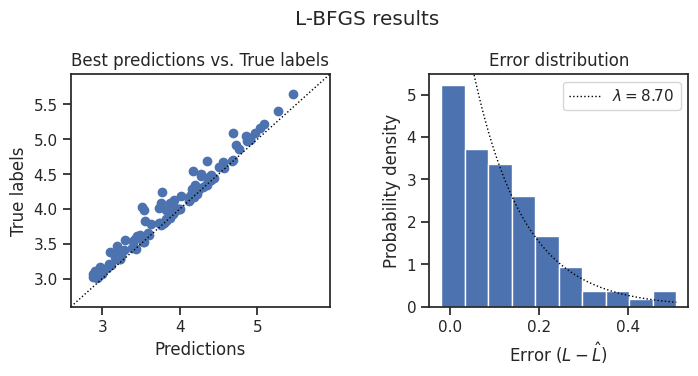

           INFO     Loss predictor:                                                                     ]8;id=733890;file:///opt/hpcaas/.mounts/fs-013ce0b72d8c07bba/margaretli/env_srcs/xlf/xlformers_n/scaling/core.py\core.py]8;;\:]8;id=772339;file:///opt/hpcaas/.mounts/fs-013ce0b72d8c07bba/margaretli/env_srcs/xlf/xlformers_n/scaling/core.py#380\380]8;;\
                                                                                                                   
                      L(N, D) = 1.569 + 1734. / (N ^ 0.4811) + 5193. / (D ^ 0.3937)                                
                                                                                                                   

[21:54:25] INFO     [102nd] 2.09e+18 FLOPs => 2.81e+07 params * 1.24e+10 samples                        ]8;id=411800;file:///opt/hpcaas/.mounts/fs-013ce0b72d8c07bba/margaretli/env_srcs/xlf/xlformers_n/scaling/core.py\core.py]8;;\:]8;id=11551;file:///opt/hpcaas/.mounts/fs-013ce0b72d8c07bba/margaretli/env_srcs/xlf/xlformers_n/scaling/core.py#456\456]8;;\

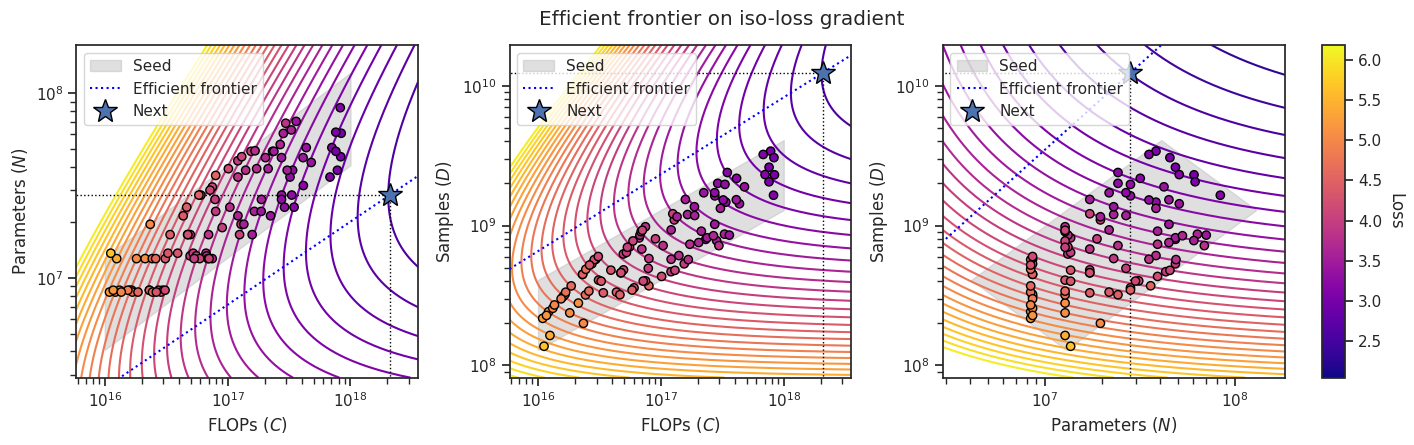

[21:54:27] INFO     Image saved to                                                                ]8;id=991856;file:///opt/hpcaas/.mounts/fs-013ce0b72d8c07bba/margaretli/env_srcs/xlf/xlformers_n/scaling/visualizer.py\visualizer.py]8;;\:]8;id=216332;file:///opt/hpcaas/.mounts/fs-013ce0b72d8c07bba/margaretli/env_srcs/xlf/xlformers_n/scaling/visualizer.py#153\153]8;;\
                    /fsx-onellm/margaretli/env_srcs/xlf/xlformers_n/scaling/tmp2/simulation--para                  
                    metric_fit.png                                                                                 

In [ ]:
cc_sim = Chinchilla(
    "/fsx-onellm/margaretli/env_srcs/xlf/xlformers_n/scaling/tmp2",
    param_grid=dict(
        E=np.linspace(1.1, 1.5, 5),
        A=np.linspace(200, 1000, 5),
        B=np.linspace(200, 1000, 5),
        alpha=np.linspace(0.1, 0.5, 5),
        beta=np.linspace(0.1, 0.5, 5),
    ),
    seed_ranges=dict(C=(1e16, 1e18), N_to_D=(10, 100)),
    # To search for the model configuration with N closest to suggested:
    model_search_config=dict(
        hyperparam_grid=dict(
            hidden_size=list(range(64, 16384 + 1, 64)),
            num_hidden_layers=list(range(1, 50 + 1)),
            num_heads=list(range(1, 40 + 1)),
        ),
        size_estimator=estimate_model_size,  # You gotta define a function to estimate & return model size also
    ),
    # Parameters you may pre-set
    num_seeding_steps=100,
    scaling_factor=2.0,
)

cc_sim.simulate(
    num_seeding_steps=101,
    num_scaling_steps=1,
    scaling_factor=2.0,
    target_params=dict(
        E=1.969,
        A=495.8,
        B=127100,
        alpha=0.3912,
        beta=0.5708
    ),
    # Add exponentially distributed loss averaging at 0.1
    noise_generator=(random.expovariate, (10,))
)

In [ ]:
for n, d, l in fit_df[['N', 'D', loss_name]].values:
    print(int(n), int(d), round(l, 4), round(cc.predict_loss(n, d), 4))
    n1,d1 = cc.allocate_compute(6* n * d)
    print(int(n1) , int(d1), round(cc.predict_loss(n1, d1), 4))
    print('\n')

12047168 209715200 4.985 4.985
1446383 1746753059 3.9531


12047168 262144000 4.781 4.7147
1651146 1912666390 3.8695


12047168 377487360 4.49 4.3408
2049987 2218380913 3.7417


12047168 524288000 4.122 4.0645
2491174 2535424990 3.6356


12047168 786432000 3.85 3.7877
3168759 2989901817 3.5152


12047168 1048576000 3.685 3.6267
3758569 3360951973 3.4364


16865856 209715200 4.953 4.9321
1765984 2002864097 3.8286


16865856 262144000 4.744 4.6618
2015993 2193103841 3.7512


16865856 524288000 4.019 4.0116
3041638 2907172057 3.5349


16865856 786432000 3.732 3.7348
3868946 3428284824 3.4236


16865856 1048576000 3.605 3.5738
4589084 3853738801 3.3507


16865856 1310720000 3.53 3.4659
5238757 4219781750 3.2975


16865856 1572864000 3.476 3.3875
5837288 4544524366 3.256


25174528 262144000 4.708 4.6072
2556851 2581046499 3.622


25174528 377487360 4.371 4.2333
3174468 2993592775 3.5144


25174528 524288000 3.976 3.957
3857659 3421427712 3.4249


25174528 786432000 3.68 3.6802
4906920 4034

In [ ]:
def optimal_allocation(N_BASE, D_BASE):
    min_l = float("inf")
    for i in np.linspace(1.0001, 10, 500):
        D =  D_BASE*i
        N = N_BASE/i
        new_l = cc.predict_loss(N, D)
        if new_l < min_l:
            min_l, min_t, min_s = new_l, D, N
        D =  D_BASE/i
        N = N_BASE*i
        new_l = cc.predict_loss(N, D)
        if new_l < min_l:
            min_l, min_t, min_s = new_l, D, N
    return min_l, min_t, min_s

for n, d, l in fit_df[['N', 'D', loss_name]].values:
    print(int(n), int(d))
    print(l)
    print(cc.predict_loss(n, d))
    l1,d1,n1 = optimal_allocation(n, d)
    print(int(n1) , int(d1))
    print(l1)
    print('\n')


12047168 209715200
4.985
4.984999999985012
1647441 1533574928
3.9547703446065237


12047168 262144000
4.781
4.718840361649338
1832775 1723120843
3.857229944365275


12047168 377487360
4.49
4.3450289422490425
2186788 2079603511
3.7099973379673847


12047168 524288000
4.122
4.063733022167047
2554807 2472274600
3.58925081094474


12047168 786432000
3.85
3.776513041645964
3100274 3055948513
3.4542959689303943


12047168 1048576000
3.685
3.606400257281166
3563370 3545062514
3.3671463347407986


16865856 209715200
4.953
4.940336312211292
1938288 1824819455
3.8099082988155475


16865856 262144000
4.744
4.674176673875618
2152438 2054080532
3.720864675706088


16865856 524288000
4.019
4.019069334393327
3002493 2945074156
3.4762293855438813


16865856 786432000
3.732
3.7318493538722444
3646426 3637491967
3.353030711009378


16865856 1048576000
3.605
3.5617365695074463
4184944 4225893875
3.2734723435468744


16865856 1310720000
3.53
3.4461957838073793
4641973 4762287832
3.215892463897352


168658